In [1]:
import torch
import matplotlib.pyplot as plt
import torch
import plotly.graph_objects as go
import networkx as nx
import numpy as np
import pandas as pd
import torch.nn.functional as F

In [42]:
# def calculate_feature_importance(x_f, w_att_f):
#     # x_f 大小為 (batch, 12)
#     # w_att_f 大小為 (batch, 3)，表示注意力權重
    
#     # 計算每個特徵的加權值
#     # 首先檢查 x_f 的形狀，然後正確擴展 w_att_f
    
#     # 將 w_att_f 擴展到 (batch, 12)，但 w_att_f 將對應的權重應用於每個特徵
#     expanded_weights = w_att_f.unsqueeze(-1)  # (batch, 3, 1)
    
#     # 將注意力權重應用到每個特徵
#     x_f_unsqueezed = x_f.unsqueeze(1)  # (batch, 1, 12)
    
#     # 現在進行逐元素相乘，注意要確保維度對齊
#     weighted_x_f = expanded_weights * x_f_unsqueezed  # (batch, 3, 12)
    
#     # 計算每個特徵的加權和，這樣可以求出每個特徵在所有樣本中的重要性
#     feature_importance = torch.mean(weighted_x_f, dim=1)  # (batch, 12)
    
#     # 平均 batch 內所有樣本的特徵重要性
#     feature_importance_mean = torch.mean(feature_importance, dim=0)  # (12,)
    
#     return feature_importance_mean

In [25]:
import torch

# 假設你要載入的模型或者權重是存儲在檔案 normal_MA_x_img.pth
model_path = '/home/jding/Documents/PD_contrastive_research_0817/data_handlder/important_score/normal_abnormal_x_img.pth'

# 使用 torch.load() 來載入該檔案
loaded_img = torch.load(model_path)


In [26]:
import torch

# 假設你要載入的模型或者權重是存儲在檔案 normal_MA_x_img.pth
model_path_weight = '/home/jding/Documents/PD_contrastive_research_0817/data_handlder/important_score/normal_abnormal_score.pth'

# 使用 torch.load() 來載入該檔案
loaded_x_score = torch.load(model_path_weight)

In [257]:
loaded_x_score 

tensor([[0.0740, 0.0543, 0.1076,  ..., 0.3783, 0.0000, 0.0000],
        [0.4024, 0.3105, 0.5596,  ..., 0.4526, 0.0034, 0.0160],
        [0.2896, 0.1260, 0.2937,  ..., 0.2981, 0.0762, 0.0582],
        ...,
        [0.0512, 0.0757, 0.0283,  ..., 0.3826, 0.0419, 0.0215],
        [0.3112, 0.2415, 0.3504,  ..., 0.3466, 0.0069, 0.0106],
        [0.2097, 0.1510, 0.2820,  ..., 0.3560, 0.0243, 0.0321]],
       device='cuda:0', requires_grad=True)

In [218]:
import torch

# 假設你要載入的模型或者權重是存儲在檔案 normal_MA_x_img.pth
model_path_f = '/home/jding/Documents/PD_contrastive_research_0817/data_handlder/important_score/mid_abnormal_x_f.pth'

# 使用 torch.load() 來載入該檔案
loaded_x_f= torch.load(model_path_f)

In [196]:
loaded_x_f.mean(dim=0)

tensor([0.4825, 0.4941, 0.4674, 0.4942, 0.3204, 0.3176, 0.5681, 0.5852, 0.9179,
        0.9182, 0.0490, 0.0595], device='cuda:0')

In [184]:
loaded_x_f[:,8:10]

tensor([[0.9400, 0.9800],
        [0.7800, 0.7900],
        [0.8300, 0.8400],
        [0.8900, 1.0100],
        [0.9100, 0.9400],
        [0.8400, 0.9000],
        [1.0500, 0.9300],
        [0.8700, 0.8400],
        [0.7500, 0.9300],
        [0.8200, 0.9300],
        [0.9100, 0.9200],
        [0.8700, 0.8100],
        [0.9600, 0.8400],
        [0.8400, 0.8500],
        [0.8900, 0.9400],
        [0.9200, 0.9000],
        [0.9400, 0.9100],
        [0.9700, 0.9300],
        [0.8500, 0.7500],
        [0.8600, 0.8500],
        [0.8500, 0.8200],
        [1.0300, 0.9800],
        [0.9000, 0.8300],
        [0.9200, 0.8600],
        [0.9600, 1.0800],
        [0.9400, 0.9000],
        [0.9900, 1.0600],
        [0.9500, 0.8900],
        [0.8800, 0.9900],
        [0.8100, 0.7600],
        [1.0800, 1.1400],
        [0.7000, 0.8000],
        [0.9800, 0.9700],
        [1.1300, 0.9500],
        [0.8200, 0.9600],
        [1.0000, 0.9400],
        [0.8700, 0.8800],
        [0.9500, 1.0000],
        [0.8

In [176]:
# w = torch.matmul(loaded_x_weight, loaded_x_weight.T)
w_norm = F.normalize(loaded_x_weight,dim=-1)
w_norm = torch.sigmoid(w_norm)

In [186]:
x_f_norm = F.normalize(loaded_x_f, dim=-1)

In [187]:
x_f_norm

tensor([[0.3180, 0.3281, 0.3046,  ..., 0.3281, 0.0100, 0.0033],
        [0.2686, 0.2110, 0.2302,  ..., 0.5052, 0.0320, 0.0448],
        [0.2276, 0.2211, 0.1756,  ..., 0.5462, 0.0000, 0.0065],
        ...,
        [0.1337, 0.1592, 0.1528,  ..., 0.6176, 0.0064, 0.0573],
        [0.3300, 0.3009, 0.3656,  ..., 0.3559, 0.0097, 0.0259],
        [0.2358, 0.2358, 0.2471,  ..., 0.5615, 0.0168, 0.0337]],
       device='cuda:0')

In [177]:
w_norm 

tensor([[0.5187, 0.4880, 0.4852,  ..., 0.4881, 0.5282, 0.4879],
        [0.4817, 0.5127, 0.5156,  ..., 0.5127, 0.4724, 0.5128],
        [0.4816, 0.5127, 0.5155,  ..., 0.5126, 0.4723, 0.5128],
        ...,
        [0.4817, 0.5128, 0.5157,  ..., 0.5128, 0.4725, 0.5129],
        [0.5187, 0.4880, 0.4851,  ..., 0.4881, 0.5282, 0.4878],
        [0.4816, 0.5127, 0.5156,  ..., 0.5127, 0.4724, 0.5128]],
       device='cuda:0', grad_fn=<SigmoidBackward0>)

In [135]:
w_norm.shape

torch.Size([206, 206])

In [124]:
torch.matmul(w, loaded_x_f).shape

torch.Size([206, 12])

In [138]:
loaded_x_f.shape

torch.Size([206, 12])

In [192]:
x_f_norm.mean(dim=0)

tensor([0.2375, 0.2447, 0.2275, 0.2432, 0.1540, 0.1549, 0.2845, 0.2933, 0.4945,
        0.4960, 0.0273, 0.0324], device='cuda:0')

In [188]:
torch.matmul(w_norm, x_f_norm).mean(dim=0)

tensor([27.0747, 27.9000, 25.9241, 27.7188, 17.5503, 17.6631, 32.4341, 33.4446,
        56.4332, 56.5994,  3.1136,  3.7000], device='cuda:0',
       grad_fn=<MeanBackward1>)

In [26]:
loaded_x_f.shape

torch.Size([206, 12])

In [23]:
loaded_x_weight.shape

torch.Size([206, 3])

In [7]:
loaded_img.cpu().numpy().shape

(206, 3, 128, 128)

In [4]:
# test_f  = np.load('/home/jding/Documents/PD_contrastive_research_0817/PD_features_test_52_normal_mid.npy')

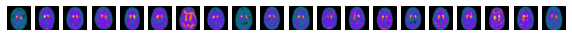

In [243]:
import numpy as np
import matplotlib.pyplot as plt

# 加載影像數據
# raw_test_img = np.load('/home/jding/Documents/PD_contrastive_research_0817/raw_image_test_52_normal_mid.npy')
raw_test_img = loaded_img.cpu().numpy()

# 將影像數據乘以 255
raw_test_img = raw_test_img * 255

# 顯示前5張影像
num_images_to_show = 20
plt.figure(figsize=(10, 10))

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    # 重新排列軸順序，從 (3, 128, 128) 到 (128, 128, 3)
    plt.imshow(np.transpose(raw_test_img[i], (2, 1, 0)).astype(np.uint8))
    plt.axis('off')
    
plt.show()


In [224]:
loaded_x_score[1] 

tensor([0.5335, 0.4303, 0.3517, 0.5749, 0.3205, 0.1951, 0.5836, 0.5094, 0.5735,
        0.3526, 0.0139, 0.0052], device='cuda:0', grad_fn=<SelectBackward0>)

array([0.23158994, 0.14664325, 0.13934393, 0.1187807 , 0.01866855,
       0.06833635, 0.36725432, 0.2655879 , 0.4702739 , 0.28289905,
       0.02309333, 0.03560077], dtype=float32)

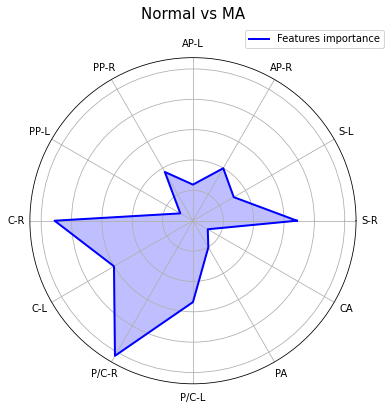

In [244]:
import numpy as np
import matplotlib.pyplot as plt

# 資料
labels = ['S-R', 'S-L', 'AP-R', 'AP-L', 'PP-R', 'PP-L', 'C-R', 'C-L', 'P/C-R','P/C-L', 'PA', 'CA']
num_labels = len(labels)

# 定義HC和ASD的數值
# HC_values = [0.5335, 0.4303, 0.3517, 0.5749, 0.3205, 0.1951, 0.5836, 0.5094, 0.5735,
#         0.3526, 0.0139, 0.0052]
HC_values = list(loaded_x_score[18].cpu().detach().numpy())
# ASD_values = [0.07, 0.05, 0.07, 0.06, 0.08, 0.04, 0.06, 0.07]

# 將資料轉換為圓形座標
angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()
HC_values += HC_values[:1]
# ASD_values += ASD_values[:1]
angles += angles[:1]

# 開始繪製雷達圖
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 繪製HC數據
ax.fill(angles, HC_values, color='blue', alpha=0.25)
ax.plot(angles, HC_values, color='blue', linewidth=2, label='Features importance')

# 繪製ASD數據
# ax.fill(angles, ASD_values, color='red', alpha=0.25)
# ax.plot(angles, ASD_values, color='red', linewidth=2, label='ASD')

# 添加標籤
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# 添加標題和圖例
plt.title('Normal vs MA', size=15, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# 顯示圖表
plt.show()


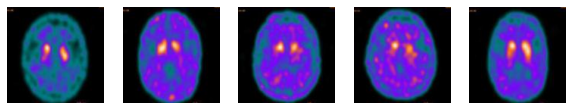

In [246]:
import numpy as np
import matplotlib.pyplot as plt

# 加載影像數據
# raw_test_img = np.load('/home/jding/Documents/PD_contrastive_research_0817/raw_image_test_52_normal_mid.npy')
raw_test_img = loaded_img.cpu().numpy()

# 將影像數據乘以 255
raw_test_img = raw_test_img * 255

# 顯示前5張影像
num_images_to_show = 5
plt.figure(figsize=(10, 10))

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    # 重新排列軸順序，從 (3, 128, 128) 到 (128, 128, 3)
    plt.imshow(np.transpose(raw_test_img[i], (2, 1, 0)).astype(np.uint8))
    plt.axis('off')
    
plt.show()


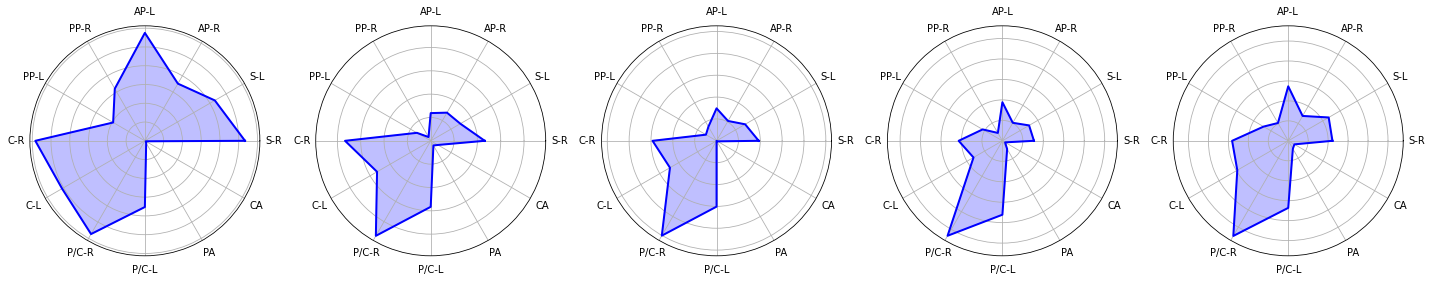

In [251]:
import numpy as np
import matplotlib.pyplot as plt

# 資料
labels = ['S-R', 'S-L', 'AP-R', 'AP-L', 'PP-R', 'PP-L', 'C-R', 'C-L', 'P/C-R', 'P/C-L', 'PA', 'CA']
num_labels = len(labels)

# 假設 loaded_x_score 是已經定義的數據
# 這裡是使用 loaded_x_score 的第18個值，並顯示最多 5 個
HC_values_list = [list(loaded_x_score[i].cpu().detach().numpy()) for i in range(min(5, len(loaded_x_score)))]

# 將資料轉換為圓形座標
angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()
angles += angles[:1]  # 為了封閉雷達圖，首尾相接

# 創建 1*5 的圖像佈局
fig, axs = plt.subplots(1, 5, figsize=(20, 4), subplot_kw=dict(polar=True))

# 如果只有一個子圖時，axs 會不是 array，需要轉換成 array
if not isinstance(axs, np.ndarray):
    axs = [axs]

# 開始繪製最多 5 張雷達圖
for i, HC_values in enumerate(HC_values_list):
    HC_values += HC_values[:1]  # 首尾相接
    ax = axs[i]  # 獲取當前子圖
    
    # 繪製HC數據
    ax.fill(angles, HC_values, color='blue', alpha=0.25)
    ax.plot(angles, HC_values, color='blue', linewidth=2, label=f'HC {i+1}')
    
    # 添加標籤和其他設置
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
#     ax.set_title(f'HC {i+1}', size=15, color='black', y=1.1)

# 添加整體標題
# plt.suptitle('Normal vs MA (最多5個)', size=20, color='black', y=1.05)

# 顯示圖表
plt.tight_layout()
plt.show()


# MA vs Abnormal

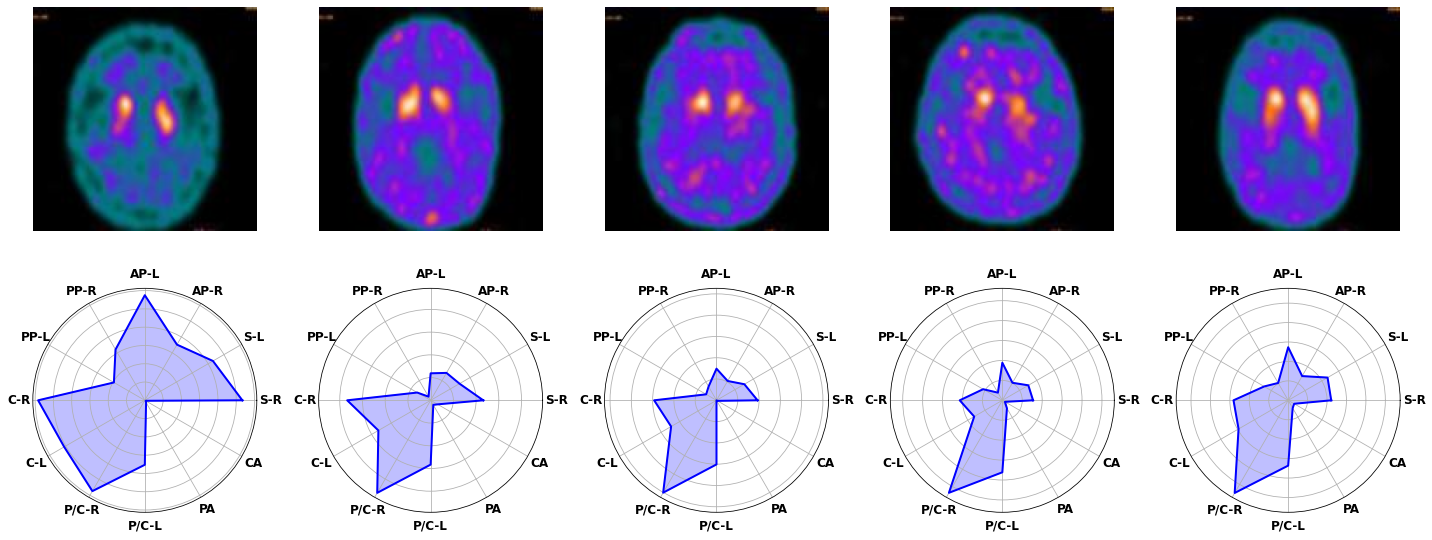

In [273]:
import numpy as np
import matplotlib.pyplot as plt

# 加載影像數據
raw_test_img = loaded_img.cpu().numpy()

# 確保數據在 0 到 255 之間
raw_test_img = np.clip(raw_test_img * 255, 0, 255)

# 資料標籤
labels = ['S-R', 'S-L', 'AP-R', 'AP-L', 'PP-R', 'PP-L', 'C-R', 'C-L', 'P/C-R', 'P/C-L', 'PA', 'CA']
num_labels = len(labels)

# 假設 loaded_x_score 是已經定義的數據，這裡取第18個值並顯示最多 5 個
HC_values_list = [list(loaded_x_score[i].cpu().detach().numpy()) for i in range(min(5, len(loaded_x_score)))]

# 將資料轉換為圓形座標
angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()
angles += angles[:1]  # 為了封閉雷達圖，首尾相接

# 創建 2*5 的圖像佈局來顯示影像和對應的雷達圖
fig, axs = plt.subplots(2, 5, figsize=(20, 8), subplot_kw=dict(polar=False))

# 如果只有一個子圖時，axs 會不是 array，需要轉換成 array
if not isinstance(axs, np.ndarray):
    axs = [axs]

# 顯示前5張影像和對應的雷達圖
num_images_to_show = 5
for i in range(num_images_to_show):
    # 顯示影像
    ax_img = axs[0, i]
    ax_img.imshow(np.transpose(raw_test_img[i],(2, 1, 0)).astype(np.uint8))
    ax_img.axis('off')  # 隱藏坐標軸
    
    # 繪製對應的雷達圖
    HC_values = HC_values_list[i]  # 獲取對應的HC數據
    HC_values += HC_values[:1]  # 首尾相接
    ax_radar = axs[1, i]
    
    # 將雷達圖的軸設置為 polar
    ax_radar = plt.subplot(2, 5, i + 6, polar=True)  # 第二行的子圖
    
    # 繪製雷達圖
    ax_radar.fill(angles, HC_values, color='blue', alpha=0.25)
    ax_radar.plot(angles, HC_values, color='blue', linewidth=2)
    
    # 設置標籤
    ax_radar.set_yticklabels([])
    ax_radar.set_xticks(angles[:-1])
    ax_radar.set_xticklabels(labels)
    ax_radar.set_xticklabels(labels, fontsize=12, fontweight='bold')
#     ax_radar.set_title(f'HC {i+1}', size=15, color='black', y=1.1)

# 添加整體標題
# plt.suptitle('影像與對應雷達圖 (最多5個)', size=20, color='black', y=1.05)

# 顯示圖表
plt.tight_layout()
plt.show()


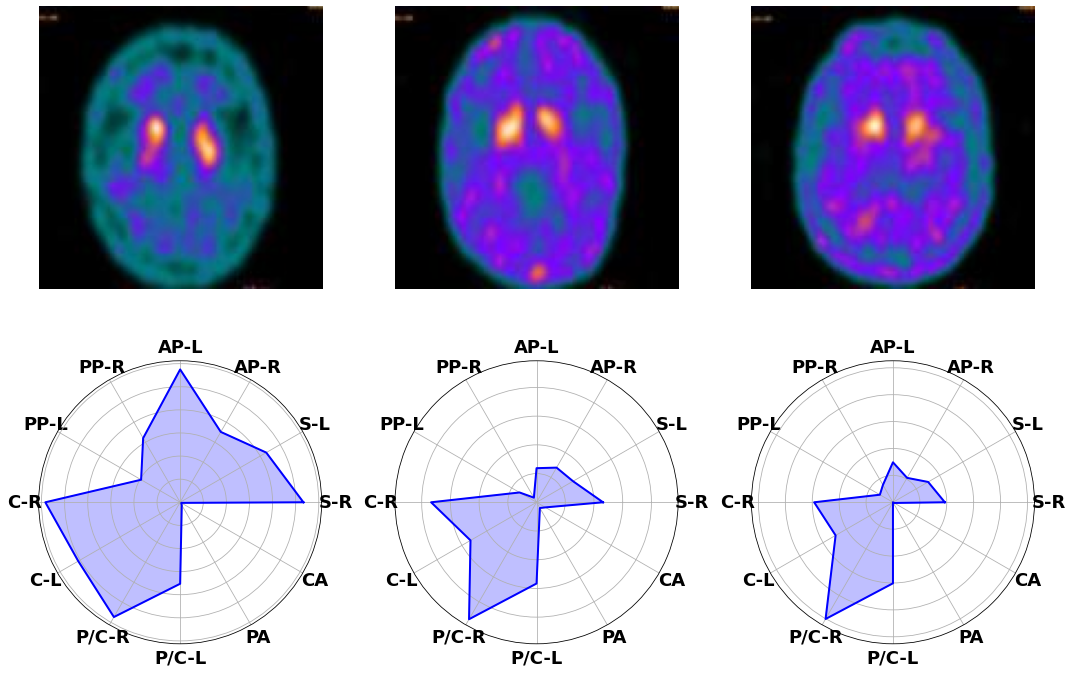

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 加載影像數據，假設 raw_test_img 是已經定義的數據
raw_test_img = loaded_img.cpu().numpy()

# 確保數據在 0 到 255 之間
raw_test_img = np.clip(raw_test_img * 255, 0, 255)

# 資料標籤
labels = ['S-R', 'S-L', 'AP-R', 'AP-L', 'PP-R', 'PP-L', 'C-R', 'C-L', 'P/C-R', 'P/C-L', 'PA', 'CA']
num_labels = len(labels)

# 假設 loaded_x_score 是已經定義的數據，這裡取第18個值並顯示最多3個
HC_values_list = [list(loaded_x_score[i].cpu().detach().numpy()) for i in range(min(3, len(loaded_x_score)))]

# 將資料轉換為圓形座標
angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()
angles += angles[:1]  # 為了封閉雷達圖，首尾相接

# 創建 2x3 的圖像佈局來顯示影像和對應的雷達圖
fig, axs = plt.subplots(2, 3, figsize=(15, 10), subplot_kw=dict(polar=False))

# 如果只有一個子圖時，axs 會不是 array，需要轉換成 array
if not isinstance(axs, np.ndarray):
    axs = [axs]

# 顯示前3張影像和對應的雷達圖
num_images_to_show = 3
for i in range(num_images_to_show):
    # 顯示影像
    ax_img = axs[0, i]
    ax_img.imshow(np.transpose(raw_test_img[i], (2, 1, 0)).astype(np.uint8))  # 確保影像維度正確
    ax_img.axis('off')  # 隱藏坐標軸

    # 繪製對應的雷達圖
    HC_values = HC_values_list[i]  # 獲取對應的 HC 數據
    HC_values += HC_values[:1]  # 首尾相接

    # 將雷達圖的軸設置為 polar
    ax_radar = plt.subplot(2, 3, i + 4, polar=True)  # 第二行的子圖從索引 4 開始
    ax_radar.fill(angles, HC_values, color='blue', alpha=0.25)
    ax_radar.plot(angles, HC_values, color='blue', linewidth=2, label=f'HC {i+1}')

    # 設置標籤
    ax_radar.set_yticklabels([])
    ax_radar.set_xticks(angles[:-1])
    ax_radar.set_xticklabels(labels, fontsize=18, fontweight='bold')
#     ax_radar.set_title(f'HC {i+1}', size=15, color='black', y=1.1)


# 添加整體標題
# plt.suptitle('影像與對應雷達圖 (最多3個)', size=20, color='black', y=1.02)

# 顯示圖表
plt.tight_layout()
plt.show()


# Normal vs Abnromal

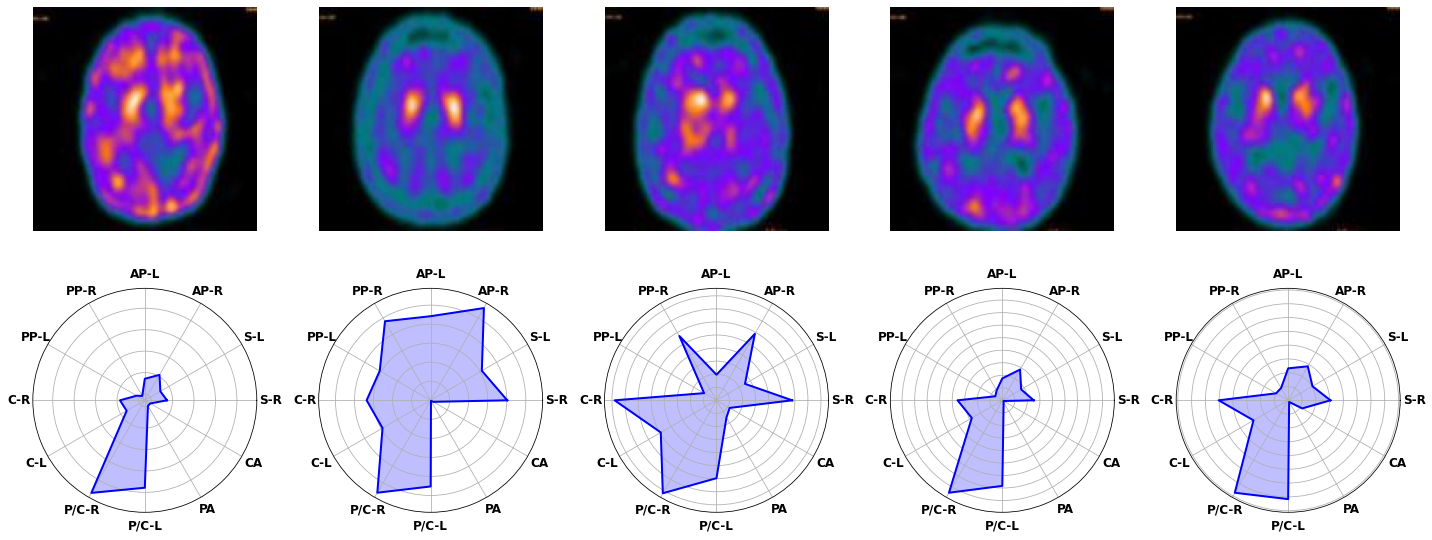

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 加載影像數據
raw_test_img = loaded_img.cpu().numpy()

# 確保數據在 0 到 255 之間
raw_test_img = np.clip(raw_test_img * 255, 0, 255)

# 資料標籤
labels = ['S-R', 'S-L', 'AP-R', 'AP-L', 'PP-R', 'PP-L', 'C-R', 'C-L', 'P/C-R', 'P/C-L', 'PA', 'CA']
num_labels = len(labels)

# 假設 loaded_x_score 是已經定義的數據，這裡取第18個值並顯示最多 5 個
HC_values_list = [list(loaded_x_score[i].cpu().detach().numpy()) for i in range(min(5, len(loaded_x_score)))]

# 將資料轉換為圓形座標
angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()
angles += angles[:1]  # 為了封閉雷達圖，首尾相接

# 創建 2*5 的圖像佈局來顯示影像和對應的雷達圖
fig, axs = plt.subplots(2, 5, figsize=(20, 8), subplot_kw=dict(polar=False))

# 如果只有一個子圖時，axs 會不是 array，需要轉換成 array
if not isinstance(axs, np.ndarray):
    axs = [axs]

# 顯示前5張影像和對應的雷達圖
num_images_to_show = 5
for i in range(num_images_to_show):
    # 顯示影像
    ax_img = axs[0, i]
    ax_img.imshow(np.transpose(raw_test_img[i],(2, 1, 0)).astype(np.uint8))
    ax_img.axis('off')  # 隱藏坐標軸
    
    # 繪製對應的雷達圖
    HC_values = HC_values_list[i]  # 獲取對應的HC數據
    HC_values += HC_values[:1]  # 首尾相接
    ax_radar = axs[1, i]
    
    # 將雷達圖的軸設置為 polar
    ax_radar = plt.subplot(2, 5, i + 6, polar=True)  # 第二行的子圖
    
    # 繪製雷達圖
    ax_radar.fill(angles, HC_values, color='blue', alpha=0.25)
    ax_radar.plot(angles, HC_values, color='blue', linewidth=2, label=f'HC {i+1}')
    
    # 設置標籤
    ax_radar.set_yticklabels([])
    ax_radar.set_xticks(angles[:-1])
    ax_radar.set_xticklabels(labels)
#     ax_radar.set_title(f'HC {i+1}', size=15, color='black', y=1.1)
    ax_radar.set_xticklabels(labels, fontsize=12, fontweight='bold')

# 添加整體標題
# plt.suptitle('影像與對應雷達圖 (最多5個)', size=20, color='black', y=1.05)

# 顯示圖表
plt.tight_layout()
plt.show()


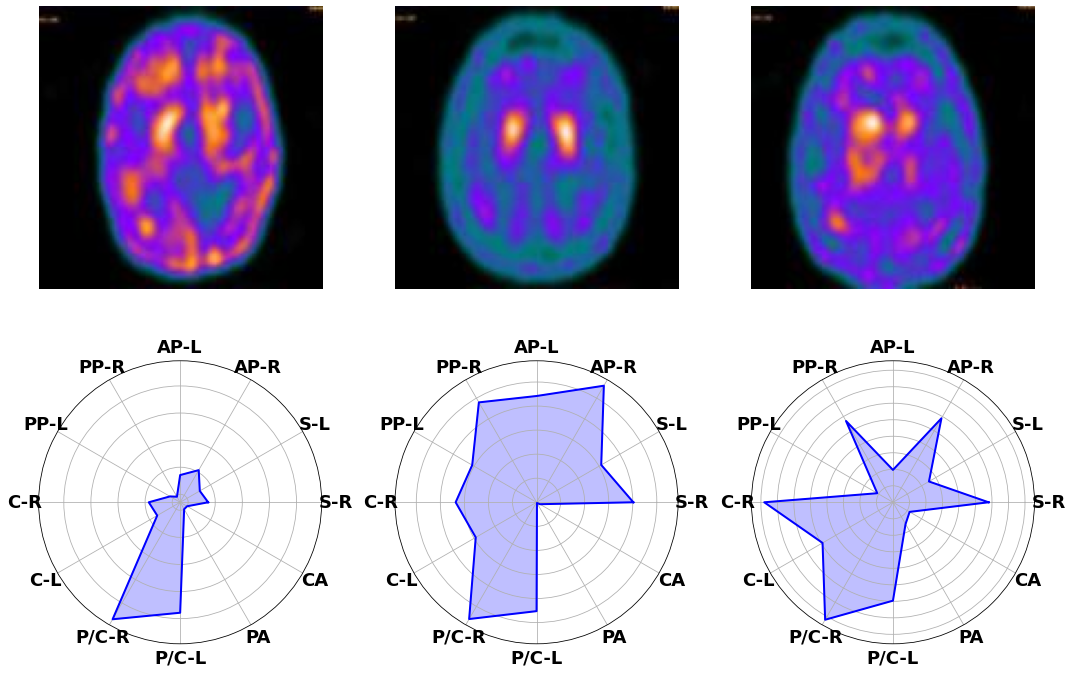

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 加載影像數據，假設 raw_test_img 是已經定義的數據
raw_test_img = loaded_img.cpu().numpy()

# 確保數據在 0 到 255 之間
raw_test_img = np.clip(raw_test_img * 255, 0, 255)

# 資料標籤
labels = ['S-R', 'S-L', 'AP-R', 'AP-L', 'PP-R', 'PP-L', 'C-R', 'C-L', 'P/C-R', 'P/C-L', 'PA', 'CA']
num_labels = len(labels)

# 假設 loaded_x_score 是已經定義的數據，這裡取第18個值並顯示最多3個
HC_values_list = [list(loaded_x_score[i].cpu().detach().numpy()) for i in range(min(3, len(loaded_x_score)))]

# 將資料轉換為圓形座標
angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()
angles += angles[:1]  # 為了封閉雷達圖，首尾相接

# 創建 2x3 的圖像佈局來顯示影像和對應的雷達圖
fig, axs = plt.subplots(2, 3, figsize=(15, 10), subplot_kw=dict(polar=False))

# 如果只有一個子圖時，axs 會不是 array，需要轉換成 array
if not isinstance(axs, np.ndarray):
    axs = [axs]

# 顯示前3張影像和對應的雷達圖
num_images_to_show = 3
for i in range(num_images_to_show):
    # 顯示影像
    ax_img = axs[0, i]
    ax_img.imshow(np.transpose(raw_test_img[i], (2, 1, 0)).astype(np.uint8))  # 確保影像維度正確
    ax_img.axis('off')  # 隱藏坐標軸

    # 繪製對應的雷達圖
    HC_values = HC_values_list[i]  # 獲取對應的 HC 數據
    HC_values += HC_values[:1]  # 首尾相接

    # 將雷達圖的軸設置為 polar
    ax_radar = plt.subplot(2, 3, i + 4, polar=True)  # 第二行的子圖從索引 4 開始
    ax_radar.fill(angles, HC_values, color='blue', alpha=0.25)
    ax_radar.plot(angles, HC_values, color='blue', linewidth=2, label=f'HC {i+1}')

    # 設置標籤
    ax_radar.set_yticklabels([])
    ax_radar.set_xticks(angles[:-1])
    ax_radar.set_xticklabels(labels, fontsize=18, fontweight='bold')
#     ax_radar.set_title(f'HC {i+1}', size=15, color='black', y=1.1)


# 添加整體標題
# plt.suptitle('影像與對應雷達圖 (最多3個)', size=20, color='black', y=1.02)

# 顯示圖表
plt.tight_layout()
plt.show()


# normal vs MA

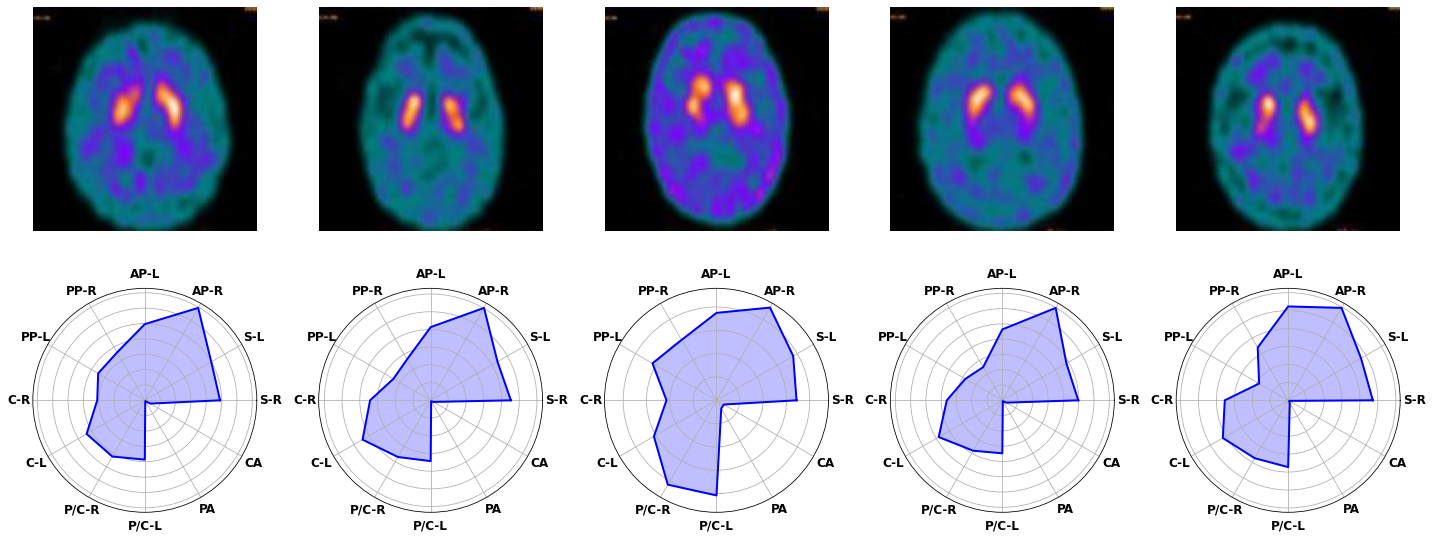

In [266]:
import numpy as np
import matplotlib.pyplot as plt

# 加載影像數據
raw_test_img = loaded_img.cpu().numpy()

# 確保數據在 0 到 255 之間
raw_test_img = np.clip(raw_test_img * 255, 0, 255)

# 資料標籤
labels = ['S-R', 'S-L', 'AP-R', 'AP-L', 'PP-R', 'PP-L', 'C-R', 'C-L', 'P/C-R', 'P/C-L', 'PA', 'CA']
num_labels = len(labels)

# 假設 loaded_x_score 是已經定義的數據，這裡取第18個值並顯示最多 5 個
HC_values_list = [list(loaded_x_score[i].cpu().detach().numpy()) for i in range(min(5, len(loaded_x_score)))]

# 將資料轉換為圓形座標
angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()
angles += angles[:1]  # 為了封閉雷達圖，首尾相接

# 創建 2*5 的圖像佈局來顯示影像和對應的雷達圖
fig, axs = plt.subplots(2, 5, figsize=(20, 8), subplot_kw=dict(polar=False))

# 如果只有一個子圖時，axs 會不是 array，需要轉換成 array
if not isinstance(axs, np.ndarray):
    axs = [axs]

# 顯示前5張影像和對應的雷達圖
num_images_to_show = 5
for i in range(num_images_to_show):
    # 顯示影像
    ax_img = axs[0, i]
    ax_img.imshow(np.transpose(raw_test_img[i],(2, 1, 0)).astype(np.uint8))
    ax_img.axis('off')  # 隱藏坐標軸
    
    # 繪製對應的雷達圖
    HC_values = HC_values_list[i]  # 獲取對應的HC數據
    HC_values += HC_values[:1]  # 首尾相接
    ax_radar = axs[1, i]
    
    # 將雷達圖的軸設置為 polar
    ax_radar = plt.subplot(2, 5, i + 6, polar=True)  # 第二行的子圖
    
    # 繪製雷達圖
    ax_radar.fill(angles, HC_values, color='blue', alpha=0.25)
    ax_radar.plot(angles, HC_values, color='blue', linewidth=2, label=f'HC {i+1}')
    
    # 設置標籤
    ax_radar.set_yticklabels([])
    ax_radar.set_xticks(angles[:-1])
    ax_radar.set_xticklabels(labels, fontsize=12, fontweight='bold')  
    ax_radar.set_xticklabels(labels)
#     ax_radar.set_title(f'HC {i+1}', size=15, color='black', y=1.1)

# 添加整體標題
# plt.suptitle('影像與對應雷達圖 (最多5個)', size=20, color='black', y=1.05)

# 顯示圖表
plt.tight_layout()
plt.show()


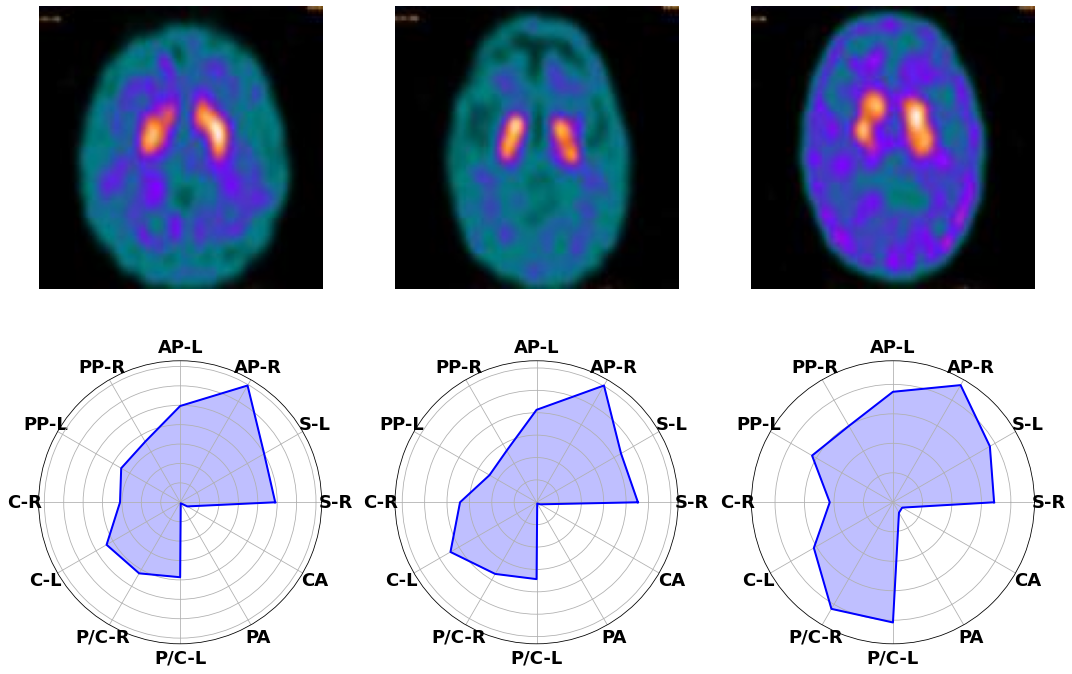

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 加載影像數據，假設 raw_test_img 是已經定義的數據
raw_test_img = loaded_img.cpu().numpy()

# 確保數據在 0 到 255 之間
raw_test_img = np.clip(raw_test_img * 255, 0, 255)

# 資料標籤
labels = ['S-R', 'S-L', 'AP-R', 'AP-L', 'PP-R', 'PP-L', 'C-R', 'C-L', 'P/C-R', 'P/C-L', 'PA', 'CA']
num_labels = len(labels)

# 假設 loaded_x_score 是已經定義的數據，這裡取第18個值並顯示最多3個
HC_values_list = [list(loaded_x_score[i].cpu().detach().numpy()) for i in range(min(3, len(loaded_x_score)))]

# 將資料轉換為圓形座標
angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()
angles += angles[:1]  # 為了封閉雷達圖，首尾相接

# 創建 2x3 的圖像佈局來顯示影像和對應的雷達圖
fig, axs = plt.subplots(2, 3, figsize=(15, 10), subplot_kw=dict(polar=False))

# 如果只有一個子圖時，axs 會不是 array，需要轉換成 array
if not isinstance(axs, np.ndarray):
    axs = [axs]

# 顯示前3張影像和對應的雷達圖
num_images_to_show = 3
for i in range(num_images_to_show):
    # 顯示影像
    ax_img = axs[0, i]
    ax_img.imshow(np.transpose(raw_test_img[i], (2, 1, 0)).astype(np.uint8))  # 確保影像維度正確
    ax_img.axis('off')  # 隱藏坐標軸

    # 繪製對應的雷達圖
    HC_values = HC_values_list[i]  # 獲取對應的 HC 數據
    HC_values += HC_values[:1]  # 首尾相接

    # 將雷達圖的軸設置為 polar
    ax_radar = plt.subplot(2, 3, i + 4, polar=True)  # 第二行的子圖從索引 4 開始
    ax_radar.fill(angles, HC_values, color='blue', alpha=0.25)
    ax_radar.plot(angles, HC_values, color='blue', linewidth=2, label=f'HC {i+1}')

    # 設置標籤
    ax_radar.set_yticklabels([])
    ax_radar.set_xticks(angles[:-1])
    ax_radar.set_xticklabels(labels, fontsize=18, fontweight='bold')
#     ax_radar.set_title(f'HC {i+1}', size=15, color='black', y=1.1)


# 添加整體標題
# plt.suptitle('影像與對應雷達圖 (最多3個)', size=20, color='black', y=1.02)

# 顯示圖表
plt.tight_layout()
plt.show()
